# 1. Import and Hyper-Parameters

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from functions.method_choose import seg_method_choose, pre_method_choose

ModuleNotFoundError: No module named 'method_position_independent'

In [ ]:
input_folder = 'd:\\15 CT_data\\CPU_test\\'
output_folder = 'd:\\15 CT_data\\CPU_test\\result'
ROI = '400'
resize_dims = '0'

In [ ]:
img_files = sorted([os.path.join(input_folder, f) for f in os.listdir(input_folder)
                    if f.endswith('.bmp') or f.endswith('.png')])
radius = int(ROI)

In [ ]:
def calculate_hist(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist


def calculate_pore(image, pre_name, seg_name):
    # Method chooses
    pro_processor = pre_method_choose(pre_name)
    segmentor, independent = seg_method_choose(seg_name)
    
    # Implement
    processed_image = pro_processor(image)
    seg_image = segmentor(processed_image)
    
    # Output
    if independent:
        # The independent methods' output is a [-1, ] image due to adopted to 3D images
        seg_image = seg_image.reshape(image.shape)
    pore = np.sum(seg_image/255) / seg_image.shape[0] / seg_image.shape[1]\
        
    return pore, processed_image, seg_image

# 2. Read Image

In [ ]:
test_img = cv2.imread(img_files[208], cv2.IMREAD_GRAYSCALE)
height, width = test_img.shape
test_img = test_img[(height // 2 - radius):(height // 2 + radius), (width // 2 - radius):(width // 2 + radius)]

# 3. Hist

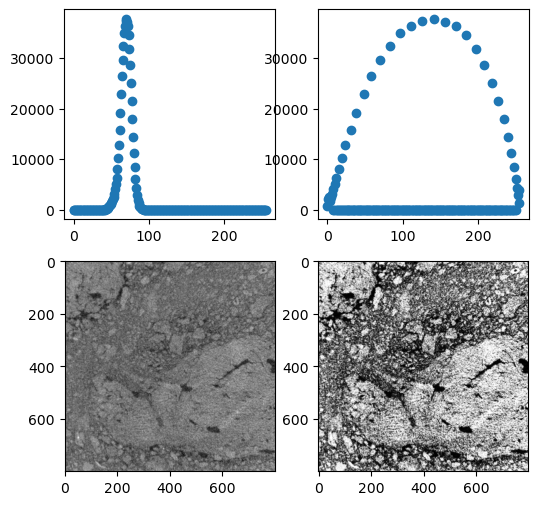

In [ ]:
test_img_hist = calculate_hist(test_img)
test_img_equalized = cv2.equalizeHist(test_img)
test_img_equalized_hist = calculate_hist(test_img_equalized)

plt.figure(figsize=(6, 6))

plt.subplot(2, 2, 1)
plt.scatter(np.arange(256), test_img_hist)
plt.subplot(2, 2, 2)
plt.scatter(np.arange(256), test_img_equalized_hist)
plt.subplot(2, 2, 3)
plt.imshow(test_img, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(test_img_equalized, cmap='gray')


# 4. Multiple Pre-process and Multi-Segmentations

NameError: name 'calculate_pore' is not defined

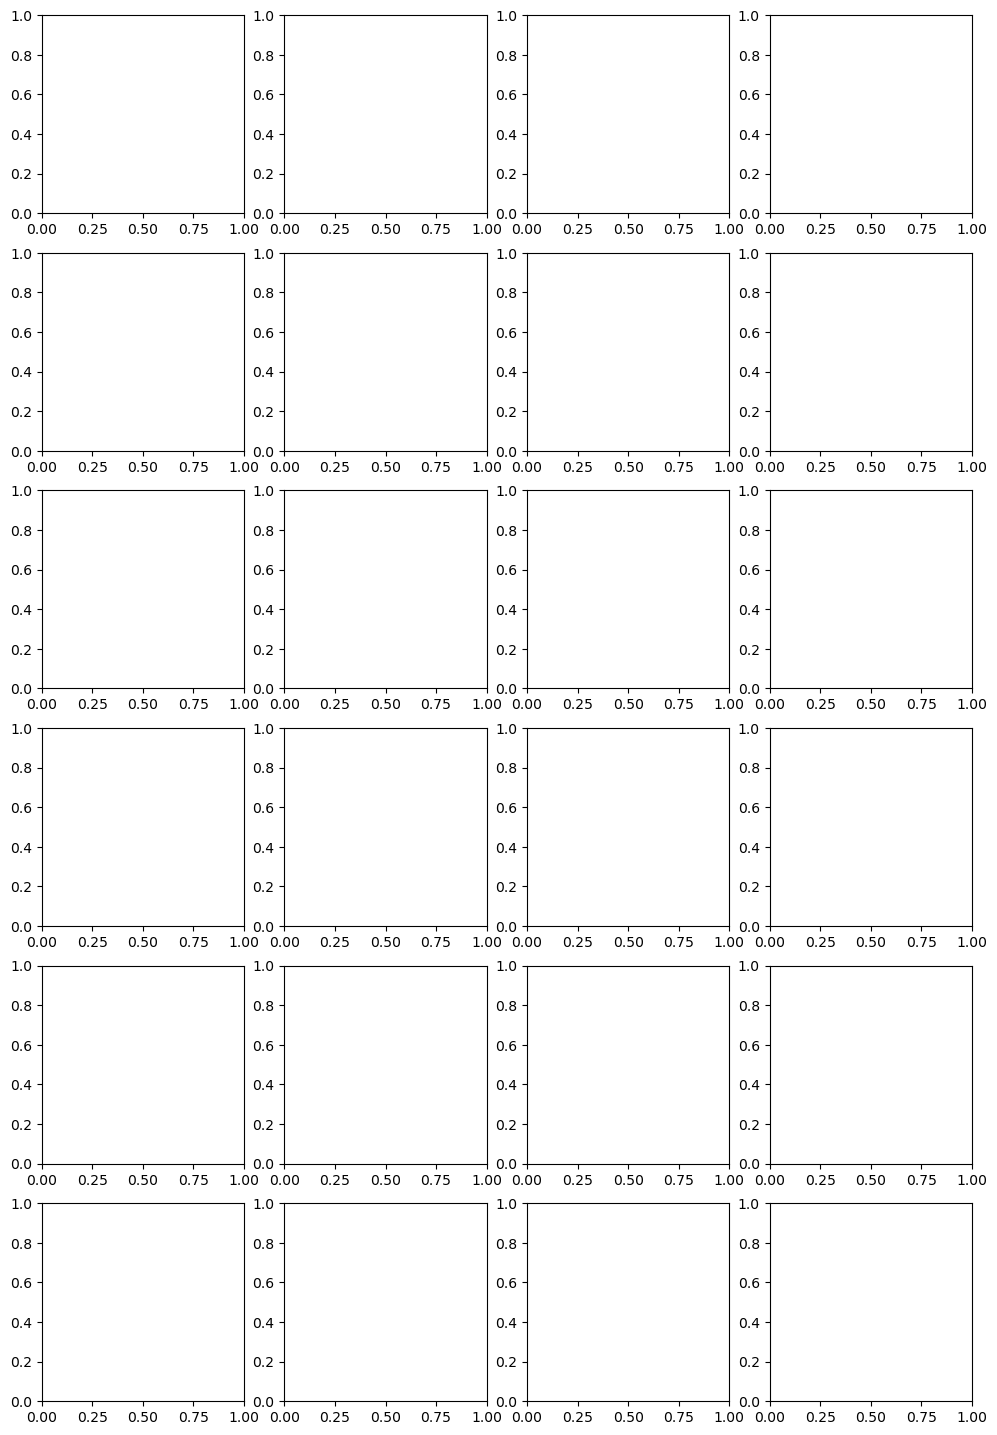

In [ ]:
method_name_list = ['origin', 'otsu', 'kapur_entropy', 'kmeans', 'gmm', 'watershed']
pre_process_list = ['orgin', 'gamma', 'equalized', 'median_filter']

pore_list = np.zeros([len(method_name_list), len(pre_process_list)])
fig, ax = plt.subplots(len(method_name_list), len(pre_process_list), figsize=(12, 18))

for i, seg in enumerate(method_name_list):
    for j, pre_process in enumerate(pre_process_list):
        pore_percent, pre_processed, segmented = calculate_pore(test_img, pre_process, seg)
        pore_list[i, j] = pore_percent
        ax[i, j].imshow(segmented, cmap='gray')
    
print(pore_list)

# 4. Threshold